In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dice_com-job_us_sample.csv')
df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [4]:
df['index'] = df.index
df.shape

(22000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             22000 non-null  object
 1   company                   21950 non-null  object
 2   employmenttype_jobstatus  21770 non-null  object
 3   jobdescription            22000 non-null  object
 4   jobid                     22000 non-null  object
 5   joblocation_address       21997 non-null  object
 6   jobtitle                  22000 non-null  object
 7   postdate                  22000 non-null  object
 8   shift                     21643 non-null  object
 9   site_name                 3490 non-null   object
 10  skills                    21957 non-null  object
 11  uniq_id                   22000 non-null  object
 12  index                     22000 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [6]:
df['jobdescription'].head()

0    Looking for Selenium engineers...must have sol...
1    The University of Chicago has a rapidly growin...
2    GalaxE.SolutionsEvery day, our solutions affec...
3    Java DeveloperFull-time/direct-hireBolingbrook...
4    Midtown based high tech firm has an immediate ...
Name: jobdescription, dtype: object

In [7]:
selected_features = ['skills','jobtitle','jobdescription','jobid','shift']
print(selected_features)

['skills', 'jobtitle', 'jobdescription', 'jobid', 'shift']


In [8]:
for feature in selected_features:
  df[feature] = df[feature].fillna('')
combined_features = df['skills']+' '+df['jobtitle']+' '+df['jobdescription']+' '+df['jobid']+' '+df['shift']
print(combined_features)

0        SEE BELOW AUTOMATION TEST ENGINEER Looking for...
1        linux/unix, network monitoring, incident respo...
2        Enterprise Solutions Architecture, business in...
3        Please see job description Java Developer (mid...
4        Configuration Management, Developer, Linux, Ma...
                               ...                        
21995    UI/UX mobile apps, interaction design, digital...
21996    JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac...
21997    SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio...
21998    Python, Ruby, Go, Clojure, Java, NoSQL-Databas...
21999    Null C/C++ Programmer Experience in C/C++ Prog...
Length: 22000, dtype: object


In [9]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 92753)	0.009488650813192065
  (0, 115278)	0.009525814650079555
  (0, 19486)	0.009521918550378698
  (0, 75152)	0.01904556842274488
  (0, 111919)	0.009534045033359381
  (0, 1026)	0.06877950730189034
  (0, 55639)	0.009440898791139097
  (0, 38478)	0.009440898791139097
  (0, 50542)	0.02452706908557548
  (0, 32492)	0.03097603241843093
  (0, 12221)	0.02438810597895925
  (0, 31533)	0.03515479978119666
  (0, 77715)	0.03358067710461446
  (0, 14988)	0.027078340763462144
  (0, 104256)	0.02618535110910092
  (0, 85472)	0.024267652930605458
  (0, 80322)	0.048507875765003386
  (0, 101480)	0.06457537106306778
  (0, 97680)	0.037419706522955204
  (0, 119972)	0.04409755460533337
  (0, 63629)	0.04333669362075324
  (0, 119451)	0.04413133245457152
  (0, 74228)	0.03136615456884043
  (0, 60841)	0.03714936296666262
  (0, 27448)	0.058255344011509363
  :	:
  (21999, 104235)	0.15281439845052094
  (21999, 14648)	0.06295005130930706
  (21999, 92753)	0.02687141729591881
  (21999, 115278)	0.026976663551575387
  

In [10]:
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.17652416 0.24042449 ... 0.36827048 0.2893128  0.07256538]
 [0.17652416 1.         0.15497715 ... 0.21760269 0.16381605 0.03992624]
 [0.24042449 0.15497715 1.         ... 0.31646507 0.21928566 0.03166156]
 ...
 [0.36827048 0.21760269 0.31646507 ... 1.         0.29809568 0.05365645]
 [0.2893128  0.16381605 0.21928566 ... 0.29809568 1.         0.04819823]
 [0.07256538 0.03992624 0.03166156 ... 0.05365645 0.04819823 1.        ]]


In [11]:
print(similarity.shape)

(22000, 22000)


In [12]:
job_name = input(' Enter the job role: ')

 Enter the job role: software


In [13]:
list_of_all_titles = df['jobtitle'].tolist()
print(list_of_all_titles)

['AUTOMATION TEST ENGINEER', 'Information Security Engineer', 'Business Solutions Architect', 'Java Developer (mid level)- FT- GREAT culture, modern technologies, career growth', 'DevOps Engineer', 'SAP FICO Architect', 'Network Engineer', 'Sr. Web Application Developer (Cloud Team) - Chicago', 'Front End Developer', 'Application Support Engineer', 'OpenStack Engineer - 12185', '9001 Data Security Administrator - Unix & IAM', 'Software Engineer Manager', 'Sales Engineer - Los Angles', 'Project Manager', 'Windows System Administrator', 'Test Lead / Test Manager', 'Principal Application Analyst-Supply Chain Lawson', 'Messaging Administrator', 'Java Architect - Denver, CO - Fulltime', 'IT Business Analyst', 'IT Sales Manager', 'Sr. Systems Test Engineer (PERM)', 'IT Quality Consultant', 'USB Validation Engineer', 'Senior Product Manager', 'Frontend/UI Developer', '1001 Selenium Automation testing', 'FireEeye HX - Security Engineer', 'Sr. Software Storage Engineer', 'C++ Software Engineer'

In [14]:
find_close_match = difflib.get_close_matches(job_name, list_of_all_titles)
print(find_close_match)

['software developer', 'software developer', 'Software Tester']


In [15]:
close_match = find_close_match[0]
print(close_match)

software developer


In [16]:
index_of_the_job = df[df.jobtitle == close_match]['index'].values[0]
print(index_of_the_job)

19648


In [17]:
similarity_score = list(enumerate(similarity[index_of_the_job]))
print(similarity_score)

[(0, 0.1492550946945341), (1, 0.08804039863950823), (2, 0.08090991899375442), (3, 0.1255760503207911), (4, 0.04429033675203452), (5, 0.029999742632409808), (6, 0.10795366534785499), (7, 0.11761523465281004), (8, 0.11529039587497833), (9, 0.10219537468133207), (10, 0.09926403508351843), (11, 0.12151675623632091), (12, 0.13882281340261923), (13, 0.08702493719700771), (14, 0.05436863888459804), (15, 0.17546216601203035), (16, 0.07256338098189796), (17, 0.13699303173672184), (18, 0.11980144196209097), (19, 0.1138314008372894), (20, 0.11446725132836409), (21, 0.02113804679964011), (22, 0.14652505868375573), (23, 0.05179495241916499), (24, 0.09046670026333496), (25, 0.06059097380341458), (26, 0.07830970975339428), (27, 0.05247871584438138), (28, 0.06408009246015763), (29, 0.1507871450612148), (30, 0.21841341997964359), (31, 0.04890849400606009), (32, 0.07171583581397235), (33, 0.06757164219729646), (34, 0.05850922482748765), (35, 0.12007336599464595), (36, 0.06620191941194938), (37, 0.063541

In [18]:
len(similarity_score)

22000

In [19]:
sorted_similar_jobs = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_jobs)

[(19648, 1.0), (21921, 0.27445731786533956), (18727, 0.22843898337138174), (18841, 0.2274869158843647), (18508, 0.2264786049769616), (19099, 0.22537674896286541), (10847, 0.22532489845440065), (2620, 0.22518207879900246), (10547, 0.22507294580396398), (19068, 0.22429218690192745), (12604, 0.2222721160702301), (16822, 0.2194835909387187), (15685, 0.21947308065100415), (18616, 0.21877811702912758), (30, 0.21841341997964359), (2381, 0.21784768455645612), (15861, 0.21700221605853343), (18645, 0.21595669117721178), (5126, 0.21524463241808658), (16620, 0.21524463241808658), (4832, 0.21478430792735456), (4923, 0.21357076287169785), (21447, 0.21348455053556042), (2692, 0.21326634416254675), (5888, 0.21254299900057505), (8290, 0.21085387518280235), (14636, 0.20897874807305145), (2209, 0.2075956484415665), (8892, 0.20755052446727257), (14606, 0.20732483702974577), (5375, 0.20722904912581466), (6988, 0.20711588871636297), (16546, 0.20647384677608463), (4688, 0.20641435270443462), (5534, 0.2064143

In [20]:
print('Job roles suggested for you : \n')

i = 1

for movie in sorted_similar_jobs:
  index = movie[0]
  title_from_index = df[df.index==index]['jobtitle'].values[0]
  if (i<=10):
    print(i, '.',title_from_index)
    i+=1
  else:
    break

Job roles suggested for you : 

1 . software developer
2 . Software Engineer
3 . SQL Server Engineer
4 . Software Developer
5 . SharePoint Developer
6 . Software Engineer - Clearance Required
7 . Senior Software Developer
8 . Programmer Analyst IV, Javascript
9 . Senior Software Developer - New York
10 . Sr .NET Developer/Full Stack (115K)


<ipython-input-21-eba738c22f43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['company'],order=df['company'].value_counts().index, palette=mypalette)
<ipython-input-21-eba738c22f43>:3: UserWarning: 
The palette list has fewer values (40) than needed (4291) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df['company'],order=df['company'].value_counts().index, palette=mypalette)


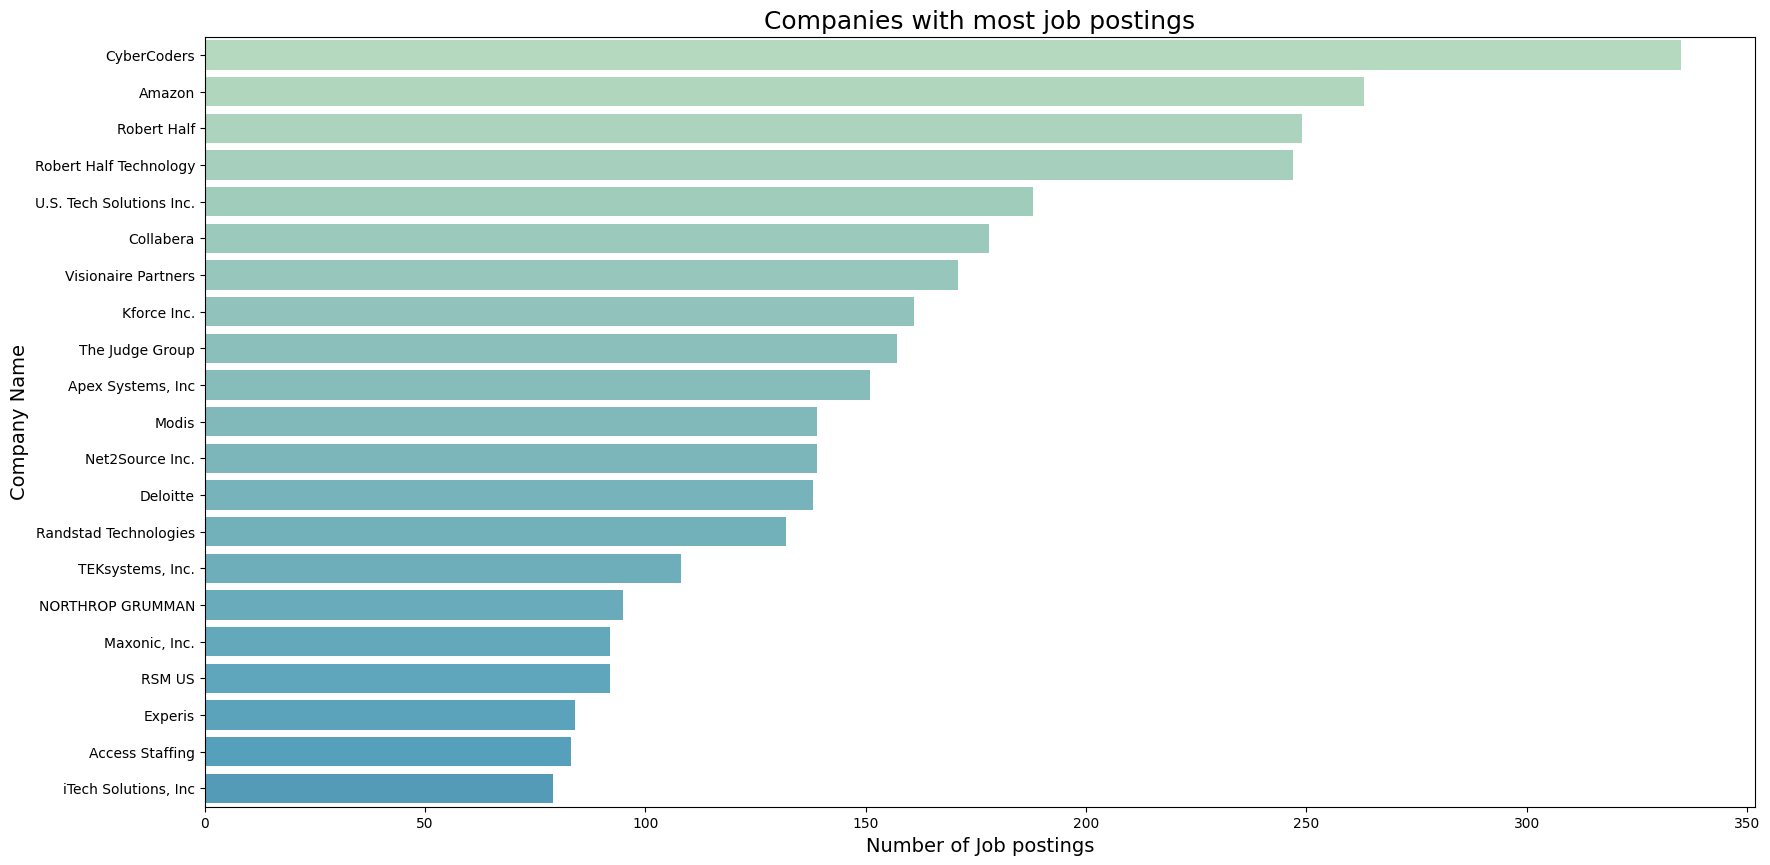

In [21]:
mypalette=sns.color_palette('GnBu_d', 40)
plt.figure(figsize=(20,10))
sns.countplot(y=df['company'],order=df['company'].value_counts().index, palette=mypalette)
plt.ylabel('Company Name', fontsize=14)
plt.xlabel('Number of Job postings', fontsize=14)
plt.title("Companies with most job postings", fontsize=18)
plt.ylim(20.5,-0.5)
plt.show()